# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [10]:
import numpy as np
import pandas as pd
import sqlite3

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [11]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [12]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [13]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [ ]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [ ]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [ ]:
sqlite_query = """
SELECT
"Product Name", AVG("Policy Value") as AVG_POLICY_VALUE
from Policy_Table
group by "Product Name"
"""

pd.read_sql(sqlite_query, conn)

,Product Name,AVG_POLICY_VALUE
0,CORPORATE MEMBERSHIP,5697.285714
1,FOCUSSED ISA,5746.341270
2,NHS PENSION,5241.500000
3,PRU BOND,4516.389831
4,PRUDENTIAL INVESTMENT PLAN,5084.515152
5,PRUDENTIAL ISA,5161.135593
6,RETIREMENT ACCOUNT,504964.959960
7,SIPP,5335.842466
8,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [ ]:
sqlite_query = """
SELECT
COUNT(DISTINCT "Customer ID") as TOTAL_COUNT
from Policy_Table
where "Policy Start Date" BETWEEN "2017-01-01 00:00:00" AND "2017-03-01 00:00:00"
AND "Customer ID" in
(
  SELECT
  "Customer ID"
  from Policy_Table
  where "Product Category" = "PENSION" AND "Policy Start Date" < "2017-01-01 00:00:00"
)
"""
pd.read_sql(sqlite_query, conn)

,TOTAL_COUNT
0,35


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [ ]:
sqlite_query = """
SELECT
"Customer ID", "Policy Number", (MAX(Policy_Value) - MIN(Policy_Value)) as DIFF
from
(
  SELECT
  "Customer ID", "Policy Number", "Policy Value" as Policy_Value
  from Policy_Table

  UNION

  SELECT
  "Customer ID", "Policy Number", Policy_Value_Snapshot as Policy_Value
  from Fund_Table
)
group by "Customer ID", "Policy Number"
order by DIFF desc 
limit 1
"""
pd.read_sql(sqlite_query, conn)

,Customer ID,Policy Number,DIFF
0,CO401070,RET100479,943283.5


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [14]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [15]:
#Insert your answer below: 
import re

regex = '^(\w|\.|\_|\-)+[@](\w|\_|\-|\.)+[.]\w{2,3}$'
for index, row in Customer_Table.iterrows():
  email = str(row['Email'])
  if(not re.search(regex, email)):
    print(row['Customer ID'], row['Email'], row['Gender'], row['Age'], row['Postcode'])

CO314757 None Female 90 None
CO720602 None Female 90 None
CO34804 None Female 90 1495-701
CO474411 None Male 90 301288
CO777973 None Female 90 None
CO311505 None Male 90 None
CO474987 None Female 89 None
CO496581 None Female 89 36520-000
CO862381 None Male 89 8301
CO401070 None Female 88 None
CO131348 None Male 88 None
CO494489 None Female 88 None
CO340827 None Male 88 6121
CO990552 None Male 87 1618
CO623285 None Female 87 None
CO276506 None Female 87 None
CO531274 None Female 87 None
CO486130 None Male 87 649787
CO607185 None Male 87 None
CO797073 None Female 87 None
CO697092 None Female 87 None
CO462135 None Male 87 None
CO636054 None Male 87 75706 CEDEX 13
CO28776 None Male 87 7019
CO259564 None Male 87 None
CO377225 None Female 85 70826
CO343669 None Female 85 None
CO76470 None Male 85 29952
CO997036 None Male 85 None
CO878780 None Female 85 None
CO714161 None Male 85 None
CO46570 None Female 85 None
CO34681 None Male 85 None
CO521545 None Male 85 4950-070
CO823952 None Male 85 No

## ***As per my observation from the above result, most of the invalid email entries are of the customers with more than 60 years of age (Senior Citizens).***

## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


Total current policy value: 507178017.0
Total policy value of Learning Population (<25): 2096014.0
Total policy value of Working Population (Between 25 and 60): 193562026.0
Total policy value of Senior Citizens (>60): 311519977.0

Pie Chart showing % of total current policy value:


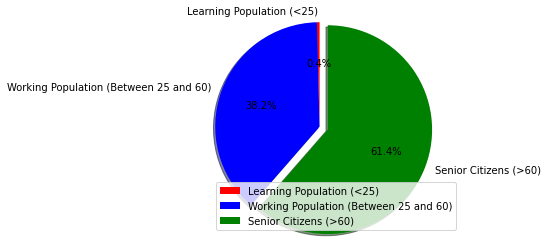

In [38]:
# Insert your answer below: 

import matplotlib.pyplot as plt

# Calculating total current policy value
TOTAL_CURRENT_POLICY_VALUE = Policy_Table['Policy Value'].sum()
print("Total current policy value:", TOTAL_CURRENT_POLICY_VALUE)

# Joining Customer_Table and Policy_table
tmp = pd.merge(Policy_Table, Customer_Table, on='Customer ID', how='inner')

# Calculating total current policy value contribution by customers of Age < 25
tmp_1 = tmp.where(tmp['Age'] < 25)
TOTAL_1 = tmp_1['Policy Value'].sum() 
print("Total policy value of Learning Population (<25):", TOTAL_1)

# Calculating total current policy value contribution by customers of Age between 25 and 60
tmp_2 = tmp.where(tmp['Age'].between(25, 60, inclusive = True))
TOTAL_2 = tmp_2['Policy Value'].sum() 
print("Total policy value of Working Population (Between 25 and 60):", TOTAL_2)

# Calculating total current policy value contribution by customers of Age > 60
tmp_3 = tmp.where(tmp['Age'] > 60)
TOTAL_3 = tmp_3['Policy Value'].sum() 
print("Total policy value of Senior Citizens (>60):", TOTAL_3)

# Defining labels
age_group_label = ['Learning Population (<25)', 'Working Population (Between 25 and 60)', 'Senior Citizens (>60)']

# Portion covered by each label
slices = [TOTAL_1, TOTAL_2, TOTAL_3]

# Color for each label
colors = ['r', 'b', 'g']

print("\nPie Chart showing % of total current policy value:")

# Plotting the pie chart
plt.pie(slices, labels = age_group_label, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0.1),
        radius = 1.2, autopct = '%1.1f%%')
  
# Plotting legend
plt.legend()
  
# Showing the plot
plt.show()


# ***As per my opinion, we can use the above graph to advertize and encourage the customers to enroll in the policies in their early phases of life. The graph demonstrates how the policy value just gets better as we get older.***